In [1]:
import numpy as np
import os
import pandas as pd
import ast

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import transforms

In [2]:
%matplotlib inline

In [3]:
path = "../data/processed/mediapipe/tamires/"

In [4]:
def get_all_files(data_path):
    files_path_list = []
    for path, subdirs, files in os.walk(data_path):
        for name in files:
            if name.endswith(".csv"):
                files_path_list.append(os.path.join(path, name))
    return files_path_list

In [5]:
def plot_x_y(img_x,img_y):
    base = plt.gca().transData
    rot = transforms.Affine2D().rotate_deg(180)
    plt.plot(img_x,img_y, 'o',transform= rot + base)
    plt.show()

In [6]:
def plot_img(img_x, img_y, img_z):
    fig = plt.figure()
    hdl = plt.scatter(img_x,img_y,c=img_z,marker='o',cmap=cm.Greys_r)
    ax = plt.gca()

In [7]:
def get_x_y_z_data(data):
    img_data_x = []
    img_data_y = []
    img_data_z = []
    for _img in img_data:
        img_data_x.append(_img[0])
        img_data_y.append(_img[1])
        img_data_z.append(_img[-1])
    return img_data_x, img_data_y, img_data_z

In [8]:
files = get_all_files(path)

In [9]:
files[:3]

['../data/processed/mediapipe/tamires/RostoIntensidade-03Terceira-Acalmar.csv',
 '../data/processed/mediapipe/tamires/RostoIntensidade-02Segunda-Sortudo.csv',
 '../data/processed/mediapipe/tamires/RostoIntensidade-04Quarta-Acusar.csv']

In [10]:
df_aniquilar = pd.read_csv(files[0], sep=";")

In [11]:
img_data = ast.literal_eval(df_aniquilar.values[0][3])

In [12]:
img_data[0]

[0.5241937637329102, 0.5811834931373596, -0.09947450459003448]

### Plotting landmarks

In [13]:
img_data_x, img_data_y, img_data_z = get_x_y_z_data(img_data)

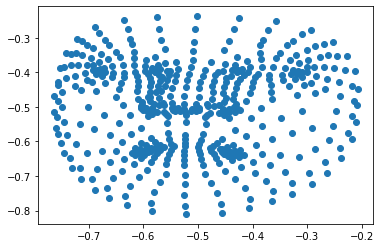

In [14]:
plot_x_y(img_data_x, img_data_y)

### Montando a base de dados

In [15]:
df_all_landmarks = pd.read_csv(f"{path}mediapipe_outpu.csv", sep=";")

In [16]:
df_all_landmarks

,Unnamed: 0,frame,video_name,keys
0,0,1,RostoIntensidade-01Primeira-Acalmar.avi,"[[0.5292638540267944, 0.5474205613136292, -0.1..."
1,1,2,RostoIntensidade-01Primeira-Acalmar.avi,"[[0.5315911769866943, 0.5401287078857422, -0.1..."
2,2,3,RostoIntensidade-01Primeira-Acalmar.avi,"[[0.5333443284034729, 0.539849579334259, -0.10..."
3,3,4,RostoIntensidade-01Primeira-Acalmar.avi,"[[0.5353459119796753, 0.5288479328155518, -0.1..."
4,4,5,RostoIntensidade-01Primeira-Acalmar.avi,"[[0.5324916243553162, 0.5147410035133362, -0.1..."
...,...,...,...,...
7628,64,65,RostoIntensidade-10Decima-Zangado.avi,"[[0.5737630128860474, 0.6623990535736084, -0.0..."
7629,65,66,RostoIntensidade-10Decima-Zangado.avi,"[[0.5724690556526184, 0.6628440022468567, -0.0..."
7630,66,67,RostoIntensidade-10Decima-Zangado.avi,"[[0.566924512386322, 0.6609828472137451, -0.09..."
7631,67,68,RostoIntensidade-10Decima-Zangado.avi,"[[0.5541202425956726, 0.6512662768363953, -0.0..."


In [17]:
df_all_landmarks.drop(columns=["Unnamed: 0", "frame", "video_name"], inplace=True)

In [18]:
df_all_landmarks

,keys
0,"[[0.5292638540267944, 0.5474205613136292, -0.1..."
1,"[[0.5315911769866943, 0.5401287078857422, -0.1..."
2,"[[0.5333443284034729, 0.539849579334259, -0.10..."
3,"[[0.5353459119796753, 0.5288479328155518, -0.1..."
4,"[[0.5324916243553162, 0.5147410035133362, -0.1..."
...,...
7628,"[[0.5737630128860474, 0.6623990535736084, -0.0..."
7629,"[[0.5724690556526184, 0.6628440022468567, -0.0..."
7630,"[[0.566924512386322, 0.6609828472137451, -0.09..."
7631,"[[0.5541202425956726, 0.6512662768363953, -0.0..."


In [29]:
def make_dfs_xy(df_all):
    imgs_x, imgs_y = [], []
    count = 0
    for index, row in df_all.iterrows():
        x, y, _ = get_x_y_z_data(row["keys"])
        imgs_x.append(x)
        imgs_y.append(y)
        count = count + 1
    df_x, df_y = pd.DataFrame(list(map(lambda x: x, imgs_x))), pd.DataFrame(list(map(lambda y: y, imgs_y)))
    return df_x, df_y

In [30]:
df_x, df_y = make_dfs_xy(df_all_landmarks)

In [32]:
df_x.head()

,0,1,2,3,4,5,6,7,8,9,...,458,459,460,461,462,463,464,465,466,467
0,0.524194,0.52615,0.521794,0.496113,0.525732,0.522811,0.513232,0.318999,0.508642,0.507589,...,0.548586,0.562419,0.584393,0.544906,0.541386,0.570102,0.55725,0.551677,0.6798,0.692215
1,0.524194,0.52615,0.521794,0.496113,0.525732,0.522811,0.513232,0.318999,0.508642,0.507589,...,0.548586,0.562419,0.584393,0.544906,0.541386,0.570102,0.55725,0.551677,0.6798,0.692215
2,0.524194,0.52615,0.521794,0.496113,0.525732,0.522811,0.513232,0.318999,0.508642,0.507589,...,0.548586,0.562419,0.584393,0.544906,0.541386,0.570102,0.55725,0.551677,0.6798,0.692215
3,0.524194,0.52615,0.521794,0.496113,0.525732,0.522811,0.513232,0.318999,0.508642,0.507589,...,0.548586,0.562419,0.584393,0.544906,0.541386,0.570102,0.55725,0.551677,0.6798,0.692215
4,0.524194,0.52615,0.521794,0.496113,0.525732,0.522811,0.513232,0.318999,0.508642,0.507589,...,0.548586,0.562419,0.584393,0.544906,0.541386,0.570102,0.55725,0.551677,0.6798,0.692215


In [36]:
len(df_x)

7633

In [37]:
df_y

,0,1,2,3,4,5,6,7,8,9,...,458,459,460,461,462,463,464,465,466,467
0,0.581183,0.490754,0.524557,0.427026,0.467563,0.441752,0.385505,0.403794,0.338957,0.312292,...,0.502626,0.494316,0.520105,0.503554,0.511808,0.390863,0.395385,0.396514,0.390187,0.379905
1,0.581183,0.490754,0.524557,0.427026,0.467563,0.441752,0.385505,0.403794,0.338957,0.312292,...,0.502626,0.494316,0.520105,0.503554,0.511808,0.390863,0.395385,0.396514,0.390187,0.379905
2,0.581183,0.490754,0.524557,0.427026,0.467563,0.441752,0.385505,0.403794,0.338957,0.312292,...,0.502626,0.494316,0.520105,0.503554,0.511808,0.390863,0.395385,0.396514,0.390187,0.379905
3,0.581183,0.490754,0.524557,0.427026,0.467563,0.441752,0.385505,0.403794,0.338957,0.312292,...,0.502626,0.494316,0.520105,0.503554,0.511808,0.390863,0.395385,0.396514,0.390187,0.379905
4,0.581183,0.490754,0.524557,0.427026,0.467563,0.441752,0.385505,0.403794,0.338957,0.312292,...,0.502626,0.494316,0.520105,0.503554,0.511808,0.390863,0.395385,0.396514,0.390187,0.379905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7628,0.581183,0.490754,0.524557,0.427026,0.467563,0.441752,0.385505,0.403794,0.338957,0.312292,...,0.502626,0.494316,0.520105,0.503554,0.511808,0.390863,0.395385,0.396514,0.390187,0.379905
7629,0.581183,0.490754,0.524557,0.427026,0.467563,0.441752,0.385505,0.403794,0.338957,0.312292,...,0.502626,0.494316,0.520105,0.503554,0.511808,0.390863,0.395385,0.396514,0.390187,0.379905
7630,0.581183,0.490754,0.524557,0.427026,0.467563,0.441752,0.385505,0.403794,0.338957,0.312292,...,0.502626,0.494316,0.520105,0.503554,0.511808,0.390863,0.395385,0.396514,0.390187,0.379905
7631,0.581183,0.490754,0.524557,0.427026,0.467563,0.441752,0.385505,0.403794,0.338957,0.312292,...,0.502626,0.494316,0.520105,0.503554,0.511808,0.390863,0.395385,0.396514,0.390187,0.379905


## Reduzindo a dimensão dos dados de 368 para 68

In [39]:
import cv2

from sklearn.decomposition import PCA
from scipy.stats import stats

In [48]:
pca_x = PCA(n_components=68)

In [49]:
pca_x.fit(df_x)

/home/manoel/miniconda3/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:555: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


PCA(n_components=68)

In [50]:
pca_x.components_

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [66]:
img_x_pca = pca_x.transform(df_x)

In [68]:
max(img_x_pca[0]) 

0.0

In [52]:
df_img_x_pca = pd.DataFrame(data = img_x_pca)

In [53]:
df_img_x_pca

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
df_img_x_pca.describe()

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
count,7633.0,7633.0,7633.0,7633.0,7633.0,7633.0,7633.0,7633.0,7633.0,7633.0,...,7633.0,7633.0,7633.0,7633.0,7633.0,7633.0,7633.0,7633.0,7633.0,7633.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
pca_y = PCA(n_components=68)

In [57]:
pca_y.fit(df_y)

/home/manoel/miniconda3/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:555: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


PCA(n_components=68)

In [60]:
img_y_pca = pca_y.transform(df_y)

In [62]:
df_img_y_pca = pd.DataFrame(data = img_y_pca)

In [64]:
df_img_y_pca.values[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

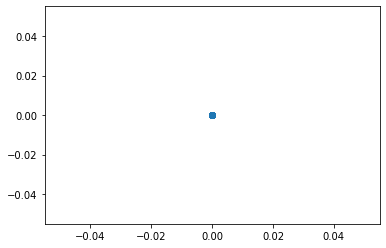

In [65]:
plot_x_y(df_img_x_pca.values[0], df_img_y_pca.values[0])

### Clustering

In [69]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

In [70]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [71]:
model.fit(df_x)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [72]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

/home/manoel/miniconda3/lib/python3.8/site-packages/scipy/cluster/hierarchy.py:2838: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim([0, dvw])


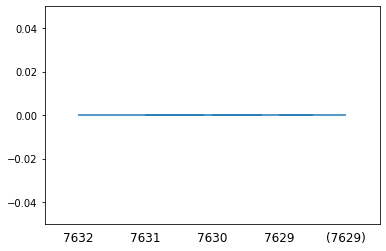

In [73]:
plot_dendrogram(model, truncate_mode="level", p=3)

In [74]:
from sklearn.cluster import KMeans

In [75]:
kmeans = KMeans(n_clusters=68, random_state=0).fit(df_x)

<ipython-input-75-d1ab861306f0>:1: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (68). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=68, random_state=0).fit(df_x)


In [76]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [77]:
max(kmeans.labels_)

0

In [80]:
df_x.max()

0      0.524194
1      0.526150
2      0.521794
3      0.496113
4      0.525732
         ...   
463    0.570102
464    0.557250
465    0.551677
466    0.679800
467    0.692215
Length: 468, dtype: float64

In [81]:
df_x

,0,1,2,3,4,5,6,7,8,9,...,458,459,460,461,462,463,464,465,466,467
0,0.524194,0.52615,0.521794,0.496113,0.525732,0.522811,0.513232,0.318999,0.508642,0.507589,...,0.548586,0.562419,0.584393,0.544906,0.541386,0.570102,0.55725,0.551677,0.6798,0.692215
1,0.524194,0.52615,0.521794,0.496113,0.525732,0.522811,0.513232,0.318999,0.508642,0.507589,...,0.548586,0.562419,0.584393,0.544906,0.541386,0.570102,0.55725,0.551677,0.6798,0.692215
2,0.524194,0.52615,0.521794,0.496113,0.525732,0.522811,0.513232,0.318999,0.508642,0.507589,...,0.548586,0.562419,0.584393,0.544906,0.541386,0.570102,0.55725,0.551677,0.6798,0.692215
3,0.524194,0.52615,0.521794,0.496113,0.525732,0.522811,0.513232,0.318999,0.508642,0.507589,...,0.548586,0.562419,0.584393,0.544906,0.541386,0.570102,0.55725,0.551677,0.6798,0.692215
4,0.524194,0.52615,0.521794,0.496113,0.525732,0.522811,0.513232,0.318999,0.508642,0.507589,...,0.548586,0.562419,0.584393,0.544906,0.541386,0.570102,0.55725,0.551677,0.6798,0.692215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7628,0.524194,0.52615,0.521794,0.496113,0.525732,0.522811,0.513232,0.318999,0.508642,0.507589,...,0.548586,0.562419,0.584393,0.544906,0.541386,0.570102,0.55725,0.551677,0.6798,0.692215
7629,0.524194,0.52615,0.521794,0.496113,0.525732,0.522811,0.513232,0.318999,0.508642,0.507589,...,0.548586,0.562419,0.584393,0.544906,0.541386,0.570102,0.55725,0.551677,0.6798,0.692215
7630,0.524194,0.52615,0.521794,0.496113,0.525732,0.522811,0.513232,0.318999,0.508642,0.507589,...,0.548586,0.562419,0.584393,0.544906,0.541386,0.570102,0.55725,0.551677,0.6798,0.692215
7631,0.524194,0.52615,0.521794,0.496113,0.525732,0.522811,0.513232,0.318999,0.508642,0.507589,...,0.548586,0.562419,0.584393,0.544906,0.541386,0.570102,0.55725,0.551677,0.6798,0.692215
